These exercises are part of practice in Chaperter 4.4 "APIs and Web Scrapping", of online courses "Become a data scientist" [www.dataquest.io](www.dataquest.io) <br>

# APIs
* Endpoints are used in API for retrieving specific data
* JSON - JavaScript Object Notation (JSON), a data format often used by API in returned data
### - get; post; patch; response
### - requests parameters, Status code, json converting, methods in response
### - API rate limiting - avoid one user overload API server
### - Authentication
### - OAuth
### - webscrapping
### - BeautifulSoup parser
after initialize with 'html.parser', can access text using tag types, IDs, class_, etc <br>

In [1]:
import requests
import json

# requests parameters, Status code, json converting, methods in response

In [3]:
# make a get request to get the latest position of the ISS from the OPenNotify APS
response = requests.get("http://api.open-notify.org/iss-now.json")
status_code = response.status_code
print(status_code)

200


* 200 - Okay
* 301 - redirected to a different endpoint (endpoint name changed)
* 401 - You are not authenticated
* 403 - Access is forbidden
* 404 - Resources not found

In [4]:
# set parameters to pass to API: latitude and longitude of NYC:
parameters = {"lat": 40.71, "lon": -47}

response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)
# it can also be done as:
# response = requests.get("http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74)
print(response.content)

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1538510164, \n    "latitude": 40.71, \n    "longitude": -47.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 567, \n      "risetime": 1538513447\n    }, \n    {\n      "duration": 561, \n      "risetime": 1538519303\n    }, \n    {\n      "duration": 630, \n      "risetime": 1538525102\n    }, \n    {\n      "duration": 609, \n      "risetime": 1538530898\n    }, \n    {\n      "duration": 526, \n      "risetime": 1538585159\n    }\n  ]\n}\n'


# JSON methods: 
* loads (string --> python objects), dumps (python objects --> string)
* .json() method convert response string to python object

In [6]:
food_chains_list = ['Taco Bell', 'Shake Shack', 'Chipotle']
food_franchise_dict = {"Subway": 24722,
                      "McDonalds": 14098,
                      "Starbucks": 10821,
                      "Pizza Hut": 7600}
food_chains_string = json.dumps(food_chains_list)
food_franchise_string = json.dumps(food_franchise_dict)
print(type(food_chains_string))
print(type(food_franchise_string))
print(food_franchise_string)

<class 'str'>
<class 'str'>
{"Starbucks": 10821, "McDonalds": 14098, "Subway": 24722, "Pizza Hut": 7600}


In [9]:
json_data = response.json()
print(json_data)
first_pass_duration = json_data["response"][0]["duration"]
print("\n", first_pass_duration)

{'request': {'passes': 5, 'altitude': 100, 'latitude': 40.71, 'datetime': 1538510164, 'longitude': -47.0}, 'response': [{'duration': 567, 'risetime': 1538513447}, {'duration': 561, 'risetime': 1538519303}, {'duration': 630, 'risetime': 1538525102}, {'duration': 609, 'risetime': 1538530898}, {'duration': 526, 'risetime': 1538585159}], 'message': 'success'}

 567


In [14]:
print(response.headers)

{'Content-Type': 'application/json', 'Via': '1.1 vegur', 'Server': 'nginx/1.10.3', 'Connection': 'keep-alive', 'Date': 'Tue, 02 Oct 2018 19:56:05 GMT', 'Content-Length': '519'}


In [11]:
response.__dir__()

['__subclasshook__',
 'url',
 '__reduce__',
 'close',
 '__reduce_ex__',
 '__dict__',
 '__ge__',
 '_content',
 '__iter__',
 '__repr__',
 'headers',
 'cookies',
 'raw',
 '__init__',
 '__setstate__',
 '__bool__',
 'ok',
 'status_code',
 '__getattribute__',
 '__doc__',
 '__nonzero__',
 '__setattr__',
 '__ne__',
 'iter_content',
 'is_permanent_redirect',
 '__delattr__',
 'is_redirect',
 'links',
 'reason',
 '__dir__',
 'iter_lines',
 '__eq__',
 'text',
 '__class__',
 '__hash__',
 '__format__',
 '__getstate__',
 'json',
 'request',
 'history',
 'elapsed',
 '_content_consumed',
 '__gt__',
 '__module__',
 '__weakref__',
 'apparent_encoding',
 '__attrs__',
 '__le__',
 'encoding',
 'content',
 '__new__',
 'connection',
 'raise_for_status',
 '__sizeof__',
 '__lt__',
 '__str__']

In [16]:
# request to endpoint astros.json, to find the number of people in space, :
response = requests.get("http://api.open-notify.org/astros.json")
json_data = response.json()
print(json_data)

{'message': 'success', 'number': 6, 'people': [{'name': 'Oleg Artemyev', 'craft': 'ISS'}, {'name': 'Andrew Feustel', 'craft': 'ISS'}, {'name': 'Richard Arnold', 'craft': 'ISS'}, {'name': 'Sergey Prokopyev', 'craft': 'ISS'}, {'name': 'Alexander Gerst', 'craft': 'ISS'}, {'name': 'Serena Aunon-Chancellor', 'craft': 'ISS'}]}


In [17]:
print(json_data['number'])

6


# authentication 
* it is said that after authenticated with token, the system knows who we are, and can provide some information without username.

In [20]:
# using a file for the token to hide it from code text
with open("token.txt", 'r') as myfile:
    token = myfile.read()

In [24]:
# print(token)
print(type(token))

<class 'str'>


In [25]:
headers = {"Authorization": token}
# print(headers)

In [29]:
response = requests.get("https://api.github.com/users/VikParuchuri", headers=headers)
print(response.json())
response = requests.get("https://api.github.com/users/VikParuchuri/orgs", headers=headers)
org = response.json()
print(org)    # the denial of access was probably caused by my expired payment

{'documentation_url': 'https://developer.github.com/v3', 'message': 'Bad credentials'}
{'documentation_url': 'https://developer.github.com/v3', 'message': 'Bad credentials'}


In [31]:
response = requests.get("https://api.github.com/repos/octocat/hello-world", headers=headers)
hello_world = response.json()

# also can provide information without authentication
response = requests.get("https://api.github.com/user", headers=headers)
user = response.json()
print(user)   # there is a problem here. The access might be denied after my payment expired.

{'documentation_url': 'https://developer.github.com/v3', 'message': 'Bad credentials'}


# pagination 

In [30]:
params = {"per_page": 50, "page":1}
response = requests.get("https://api.github.com/users/VikParuchuri/starred", 
                        headers=headers, params=params)
page1 = response.json()
params = {"per_page": 50, "page":2}
response = requests.get("https://api.github.com/users/VikParuchuri/starred", 
                        headers=headers, params=params)
page2 = response.json()

# post

In [32]:
# For an endpoint accept key "name", create a repositories "test", and "learning-about-apis"
# but the results showing that I am not able to access the endpoint anymore !!!
payload = {"name": "test"}

response = requests.post("https://api.github.com/user/repos", json=payload, 
                        headers=headers)
print(response.json())

payload = {"name": "learning-about-apis"}
response = requests.post("https://api.github.com/user/repos", json=payload,
                        headers=headers)
print(response.json())

{'documentation_url': 'https://developer.github.com/v3', 'message': 'Bad credentials'}
{'documentation_url': 'https://developer.github.com/v3', 'message': 'Bad credentials'}


# patch 
update an existing object

In [33]:
payload = {"description": "The best repository ever!", "name": "test"}
response = requests.patch("https://api.github.com/repos/VikParuchuri/test",
                         json=payload, headers=headers)
status = response.status_code
print(status)

401


401 error, means I am not authenticated. Possibly my payment expired

# OAuth
OAuth (Open Authorization): an open standard for token-based authentication and authorization on the Internet.

In [35]:
with open("OAuth.txt", 'r') as myfile:
    token = myfile.read()
headers = {"Authorization": token}
# print(headers)

In [38]:
headers["User-Agent"] ="Datequest/1.0"
# print(headers)

In [39]:
params = {"t": "day"}
response = requests.get("https://oauth.reddit.com/r/python/top", headers=headers,
                       params=params)
python_top = response.json()

In [40]:
print(python_top)

{'message': 'Unauthorized', 'error': 401}


Obviously, I have authorization issue. If succeeded, the response.json() will be in format of a large dictionary.

___________________
# Web scrpping

In [3]:
response = requests.get("http://dataquestio.github.io/web-scrapping-pages/simple.html")
content = response.content
print(response.headers)
print("\n", response.encoding)
print('\n', type(content))

{'ETag': 'W/"590ba6fa-239c"', 'X-Fastly-Request-ID': 'af48fd9ea63ac1ff58df2ec659520597600469fc', 'Vary': 'Accept-Encoding', 'Via': '1.1 varnish', 'Accept-Ranges': 'bytes', 'Server': 'GitHub.com', 'X-GitHub-Request-Id': '935E:5A83:68E7419:86CF2A9:5BB4E571', 'X-Cache-Hits': '1', 'Content-Type': 'text/html; charset=utf-8', 'X-Timer': 'S1538584795.901038,VS0,VE0', 'X-Cache': 'HIT', 'Age': '2921', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'", 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Date': 'Wed, 03 Oct 2018 16:39:54 GMT', 'X-Served-By': 'cache-mdw17372-MDW', 'Content-Length': '5143'}

 utf-8

 <class 'bytes'>


b'<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8">\n    <meta http-equiv="Content-Security-Policy" content="default-src \'none\'; style-src \'unsafe-inline\'; img-src data:; connect-src \'self\'">\n    <title>Site not found &middot; GitHub Pages</title>\n    <style type="text/css" media="screen">\n      body {\n        background-color: #f1f1f1;\n        margin: 0;\n        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;\n      }\n\n      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }\n\n      a { color: #4183c4; text-decoration: none; }\n      a:hover { text-decoration: underline; }\n\n      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }\n      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }\n\n      ul { list-style: none; margin: 25px 
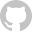
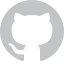

In [5]:
# the .json() is not available for this response, gives error. 
# The content is not a string of python object !
# j = response.json()
print(content)

# BeautifulSoup parser
after initialize with 'html.parser', can access text using tag types

In [2]:
from bs4 import BeautifulSoup

In [13]:
parser = BeautifulSoup(content, 'html.parser')

# get the body of the page:
body = parser.body

# get the p tag from the body:
p = body.p

print (p)
print(p.text)

print('\n', parser.head.title)
print(parser.head.title.text)
print(len(parser.find_all("title")))  # only find the 'title' in tag, not in text !!

<p><strong>There isn't a GitHub Pages site here.</strong></p>
There isn't a GitHub Pages site here.

 <title>Site not found · GitHub Pages</title>
Site not found · GitHub Pages
1


# parser using html IDs, Class_

In [38]:
# the http://dataquestio.github.io/web-scraping-pages/simple_ids.html not work. Try to use google.com
response = requests.get("https://www.google.com/")
parser = BeautifulSoup(response.content, 'html.parser')

# find the first element with specific ID:
one_specific_part = parser.find_all('div', id='gbar')[0]
print(one_specific_part.text)

another_specific_part = parser.find_all('div', id='guser')[0]
print(another_specific_part.text)

another_specific_part = parser.find_all('span', id='footer')[0]
print(another_specific_part.text)

another_specific_part = parser.find_all('span', id='gbf')[0]
print(another_specific_part)  # this one has no text, i.e. ***.text is empty

# it won't work if replance 'id' with 'class': invalid syntax. It should be class_=...
# second_paragraph = parser.find_all('div', class='gbh')[0]
# print(second_paragraph.text)

Search Images Maps Play YouTube News Gmail Drive More »
Web History | Settings | Sign in
Advertising ProgramsBusiness Solutions+GoogleAbout Google© 2018 - Privacy - Terms
<span class="gbf" id="gbf"></span>


In [17]:
print(parser)

<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"/><meta content="noodp" name="robots"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Google</title><script nonce="7vKNM2hQkYs1Zt30LlMv4w==">(function(){window.google={kEI:'5SK1W9XbBqqUjwT5pZiADw',kEXPI:'0,18167,1335580,57,1654,304,582,715,335,790,1225,590,141,141,193,55,228,156,210,417,96,62,351,87,293,63,426,2337291,111,169,32,302989,26305,1294,12383,4855,32691,15248,867,6692,4069,1696,6087,854,2481,2,2,6801,364,1217,326,1776,1263,1051,3191,224,2218,260,1028,3803,2,14,263,572,1119,2,579,727,606,1825,59,2,1,3,1297,1712,2613,2094,658,636,8,302,1267,222,552,1232,883,141,275,2,1124,

In [36]:
# it works to use style class_='...', instead of class='...'
another_part = parser.find_all('a', class_='gb1')[0]
print(another_part.text)

Images


# parser.select for CSS selectors, IDs
CSS: Cascading Sytle Sheets

In [39]:
response = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
parser = BeautifulSoup(response.content, 'html.parser')

# to find class 'first-item'
first_items = parser.select(".first-item")

In [44]:
print(first_items)
print('\n', len(first_items))

[<p class="inner-text first-item" id="first">
                First paragraph.
            </p>, <p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>]

 2


In [46]:
print(first_items[0].text)
print('-------------------\n', first_items[1])
print('--------------------\n', first_items[1].text)


                First paragraph.
            
-------------------
 <p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
--------------------
 

                First outer paragraph.
            



In [47]:
print(parser)

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>


In [50]:
# to find class 'outer-text'
first_outer_text = parser.select(".outer-text")[0].text
print(first_outer_text)
# to find ID 'second'
second = parser.select("#second")
print(len(second))
print(second[0].text)



                First outer paragraph.
            

1


                First outer paragraph.
            



In [51]:
response = requests.get("http://dataquestio.github.io/web-scraping-pages/2014_super_bowl.html")
parser = BeautifulSoup(response.content, 'html.parser')
print(parser)

<!DOCTYPE html>

<html>
<head lang="en">
<meta charset="utf-8"/>
<title>2014 Superbowl Team Stats</title>
</head>
<body>
<table class="stats_table nav_table" id="team_stats">
<tbody>
<tr id="teams">
<th></th>
<th>SEA</th>
<th>NWE</th>
</tr>
<tr id="first-downs">
<td>First downs</td>
<td>20</td>
<td>25</td>
</tr>
<tr id="total-yards">
<td>Total yards</td>
<td>396</td>
<td>377</td>
</tr>
<tr id="turnovers">
<td>Turnovers</td>
<td>1</td>
<td>2</td>
</tr>
<tr id="penalties">
<td>Penalties-yards</td>
<td>7-70</td>
<td>5-36</td>
</tr>
<tr id="total-plays">
<td>Total Plays</td>
<td>53</td>
<td>72</td>
</tr>
<tr id="time-of-possession">
<td>Time of Possession</td>
<td>26:14</td>
<td>33:46</td>
</tr>
</tbody>
</table>
</body>
</html>


On website it looks like:

 |     -           |  SEA  |   NWE |
 | --------------- | ----- | ----- |
 |    First downs  |  20   |   25  |
 |  Total yards	   | 396   | 377   |
 |  Turnovers	   |  1	   |   2   |
 | Penalties-yards | 7-70  | 5-36  |
 |   Total Plays   |  53   |  72   |
 |Time of Possession| 26:14| 33:46 | 

In [53]:
# find the number of turnovers the Seahawks (SEA) committed:
turnovers = parser.select("#turnovers")[0]   # the first section of id='turnovers'
SEA_turnovers = turnovers.select('td')[1]    # select the 2nd 'td' tag in 1st turnovers part
SEA_turnovers_text = SEA_turnovers.text
print(SEA_turnovers_text)

# find NWE team plays:
total_plays = parser.select("#total-plays")[0]  # find the 1st section of id='total_plays'
NWE_plays = total_plays.select('td')[2]    # select the 3rd 'td' tag in 1st total_plays part
patriots_plays_text = NWE_plays.text
print(patriots_plays_text)

# find SEA total_yards:
seahawks_total_yards_text = parser.select('#total-yards')[0].select("td")[1].text
print(seahawks_total_yards_text)

1
72
396
